<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week09/Week09_Regression_Model_SVM_Regression_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive

In [72]:
# Menghubungkan Google Drive agar dapat mengakses dataset
# Dataset harus sudah di-upload ke Google Drive agar dapat diproses
# Menggunakan Google Colab, kita dapat mengakses dataset yang tersimpan di Google Drive
print("Menghubungkan ke Google Drive...")
drive.mount('/content/gdrive')

In [73]:
# Mengimpor dataset "CreditDataset.csv" dari Google Drive
# Path disesuaikan dengan lokasi file di Google Drive
print("Membaca dataset dari Google Drive...")
dataset_path = '/content/gdrive/MyDrive/DATA SET/CreditDataset.csv'
df = pd.read_csv(dataset_path)

Membaca dataset dari Google Drive...


In [74]:
# Menampilkan lima data teratas dari dataset
# Memeriksa struktur dataset dan melihat beberapa sampel data
print("Menampilkan data sample:")
print(df.head())

Menampilkan data sample:
    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


In [75]:
# Memeriksa nilai null dan informasi dataset secara keseluruhan
# Untuk melihat apakah ada nilai kosong yang perlu diproses
print("Memeriksa nilai null dalam dataset...")
print(df.info())

Memeriksa nilai null dalam dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)

In [76]:
# Menghapus baris yang mengandung nilai null (jika ada)
# Mengatasi data yang hilang agar tidak mengganggu hasil model
print("Menghapus nilai null dari dataset...")
df = df.dropna()

Menghapus nilai null dari dataset...


In [77]:
# Memisahkan data fitur (X) dan target (y)
# X adalah variabel bebas (fitur) dan y adalah variabel target
X = df.drop(columns=['Class'])  # Anggap kolom Class adalah kolom yang akan diprediksi
y = df['Class']

In [78]:
# Mengidentifikasi fitur kategorikal dan numerik
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Mengubah fitur kategorikal menjadi numerik menggunakan LabelEncoder
# OneHotEncoder tidak selalu cocok untuk SVR, jadi kita menggunakan LabelEncoder
print("Melakukan label encoding untuk fitur kategorikal...")
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


# Menstandarisasi fitur numerik
print("Melakukan standardisasi fitur numerik...")
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

Melakukan label encoding untuk fitur kategorikal...
Melakukan standardisasi fitur numerik...


In [79]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
# 80% data untuk latih dan 20% data untuk uji
print("Membagi dataset menjadi train dan test...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Membagi dataset menjadi train dan test...


In [80]:
 # Membuat dan melatih model SVM Regression (SVR)
# Menggunakan kernel radial basis function (RBF)
print("Membuat model SVR dan melatih model...")
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
print("Melakukan prediksi pada data uji...")
y_pred = svm_regressor.predict(X_test)


Membuat model SVR dan melatih model...
Melakukan prediksi pada data uji...


In [81]:
# Menghitung metrik evaluasi untuk model regresi
# Mengukur kinerja model menggunakan metrik MAE, MSE, dan R-squared
print("Evaluasi Model...")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared:", r2)

Evaluasi Model...
Mean Squared Error (MSE): 0.16564033566102623
Mean Absolute Error (MAE): 0.2903990632076922
R-Squared: 0.20355650601742403


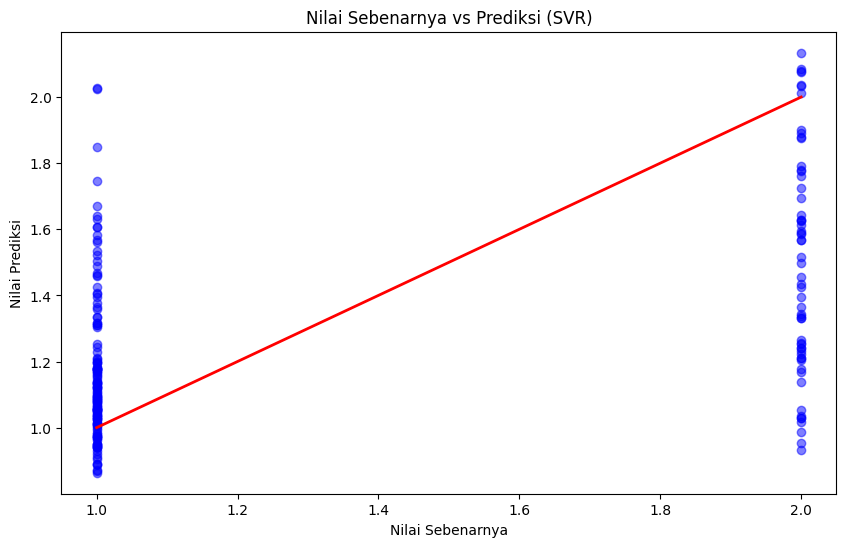

In [82]:
# Membuat plot hasil prediksi vs nilai sebenarnya
# Memvisualisasikan seberapa baik model memprediksi data uji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Sebenarnya vs Prediksi (SVR)')
plt.show()
